In [83]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Tahapan yang bakal kita lakukan 
1. Prepare Dataset
2. Clearing Data
3. Feature Engginering
4. EDA
5. Modeling
6. Evaluasi model

#### Tentang dataset
1. InvoiceNo = Invoice Number
2. StockCode = Unique Code for each transaction
3. Description = Description of individual item
4. Quantity = Number of Items brought
5. InvoiceDate = Date of purchase
6. UnitPrice = Price of individual unit
7. CustomerID = Unique ID for each customer
8. Country = Country of Rence

 


## 1. Prepare Dataset

kita pake `Online-retail.csv` sebagai data yang ingin kita clustering

In [87]:
data = pd.read_csv('Online-retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Clearing Data

In [89]:
# membuat salinan unutuk menjaga keaslian data awal
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [90]:
len(df)

541909

In [91]:
# cek apakah ada nilai yang hilang
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### hapus data menggunakan `.dropna()` 
`.dropna()` berfungsi untuk menghapus baris yang memiliki data yang hilang

In [93]:
df.dropna(inplace=True)

In [94]:
# cek kondisi data sekarang
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [95]:
len(df)

406829

setelah mengatasi data yang hilang kita cek apakah ada duplikasi pada data menggunakan `.duplicated()` dan `.sum()`

In [97]:
df.duplicated().sum()

5225

hapus duplicated data menggunakan 

In [99]:
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [100]:
len(df)

401604

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


cek apakah ada kolom yang bernilai negative

In [103]:
df_inv = df[df['Quantity']<=0]
df_inv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [104]:
df_inv = df[df['UnitPrice']<=0]
df_inv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


dataset kita berkaitan dengan harga dan jumlah barang, olehkarena itu kita akan mengambil nilai positif dan membuang nilai negatif

In [106]:
df_clean = df[df['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice']>0]

In [107]:
len(df_clean)

392692

## Feature Engginering

menambahkan kolom kolom pendukung pada dataset

In [110]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [111]:
df_clean['Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [112]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [113]:
df_amount = df_clean.groupby('CustomerID')['Amount'].sum().reset_index()
df_amount.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [114]:
df_frequency = df_clean.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [115]:
df_frequency.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [116]:
df_frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [117]:
total_quantity = df_clean.groupby('CustomerID')['Quantity'].sum().reset_index(name='TotalQuantity')
total_quantity.head()

,CustomerID,TotalQuantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [118]:
df_gabung = pd.concat([df_amount, df_frequency['Frequency'], total_quantity['TotalQuantity']], axis=1)
df_gabung.head()

,CustomerID,Amount,Frequency,TotalQuantity
0,12346.0,77183.60,1,74215
1,12347.0,4310.00,182,2458
2,12348.0,1797.24,31,2341
3,12349.0,1757.55,73,631
4,12350.0,334.40,17,197


#### Cek apakah ada outlier pada data

In [120]:
import plotly.express as px

# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'TotalQuantity']
data = df_gabung[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

In [121]:
# Removing (statistical) outliers for Amount
Q1 = df_gabung.Amount.quantile(0.25)
Q3 = df_gabung.Amount.quantile(0.75)
IQR = Q3 - Q1
df_gabung = df_gabung[(df_gabung.Amount >= Q1 - 1.5*IQR) & (df_gabung.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = df_gabung.TotalQuantity.quantile(0.25)
Q3 = df_gabung.TotalQuantity.quantile(0.75)
IQR = Q3 - Q1
df_gabung = df_gabung[(df_gabung.TotalQuantity >= Q1 - 1.5*IQR) & (df_gabung.TotalQuantity <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = df_gabung.Frequency.quantile(0.25)
Q3 = df_gabung.Frequency.quantile(0.75)
IQR = Q3 - Q1
df_gabung = df_gabung[(df_gabung.Frequency >= Q1 - 1.5*IQR) & (df_gabung.Frequency <= Q3 + 1.5*IQR)]

In [122]:
import plotly.express as px

# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'TotalQuantity']
data = df_gabung[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

## EDA

### Menggunakan Metode `np.log()+1` dan `sqrt`
Bisa di lihat perbedaan data setelah dan sebelum di normalisasi

#### 1. Membandingkan data `Amount`

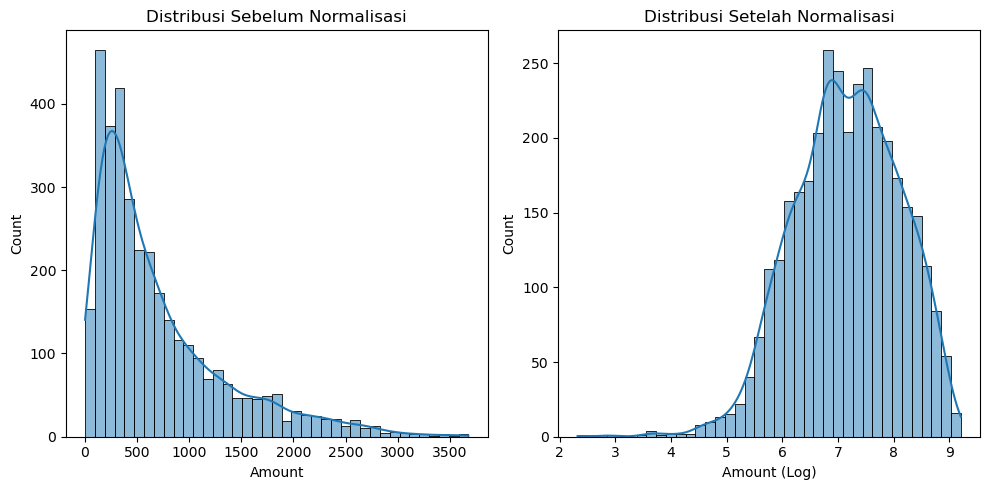

In [126]:
# Membuat subplot untuk membandingkan
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribusi sebelum normalisasi
sns.histplot(df_gabung.Amount, ax=axes[0], kde=True)
axes[0].set_title('Distribusi Sebelum Normalisasi')
axes[0].set_xlabel('Amount')

# Plot distribusi setelah normalisasi
sns.histplot(np.log(df_gabung.Amount)+1, ax=axes[1], kde=True)
axes[1].set_title('Distribusi Setelah Normalisasi')
axes[1].set_xlabel('Amount (Log)')

plt.tight_layout()
plt.show()

#### 2. Membandingkan data `Frequency`

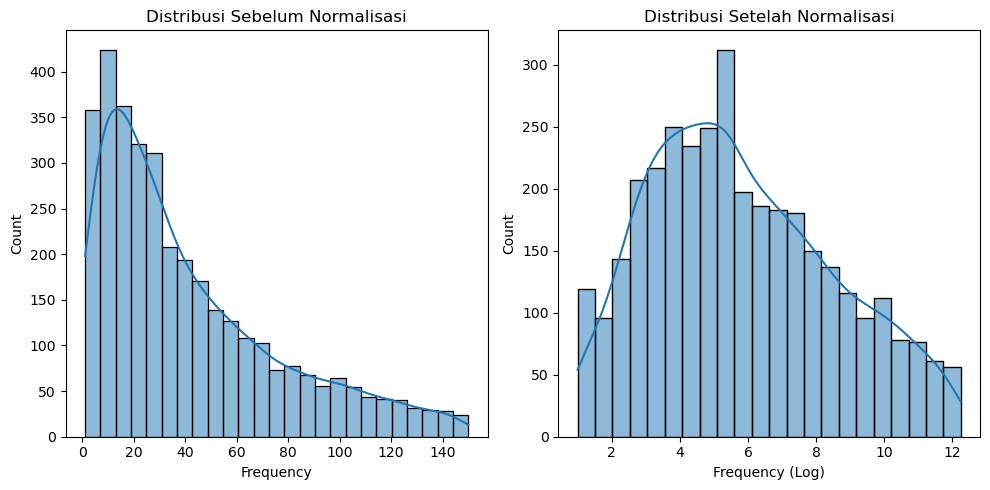

In [128]:
# Membuat subplot untuk membandingkan
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribusi sebelum normalisasi
sns.histplot(df_gabung.Frequency, ax=axes[0], kde=True)
axes[0].set_title('Distribusi Sebelum Normalisasi')
axes[0].set_xlabel('Frequency')

# Plot distribusi setelah normalisasi
sns.histplot(np.sqrt(df_gabung.Frequency), ax=axes[1], kde=True)
axes[1].set_title('Distribusi Setelah Normalisasi')
axes[1].set_xlabel('Frequency (Log)')

plt.tight_layout()
plt.show()

#### 3. Membandingkan data `TotalQuantity`

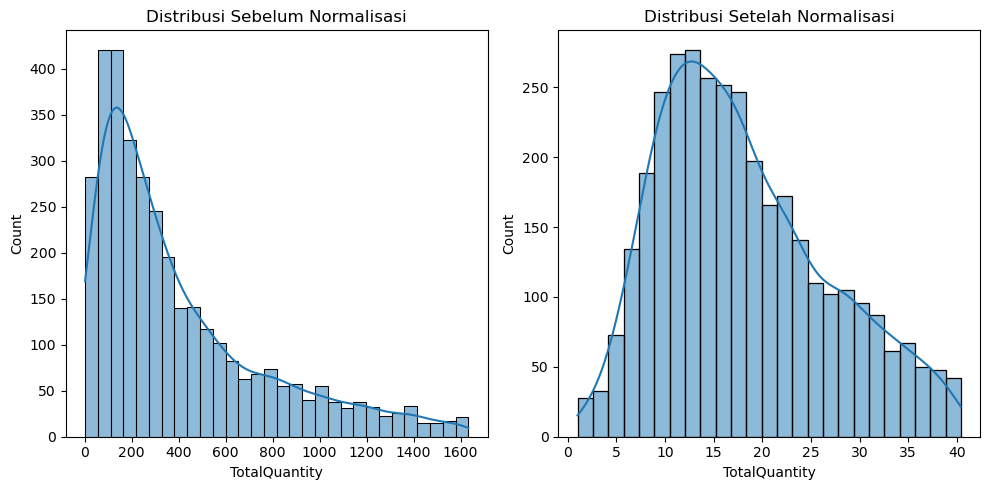

In [130]:
# Membuat subplot untuk membandingkan
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribusi sebelum normalisasi
sns.histplot(df_gabung.TotalQuantity, ax=axes[0], kde=True)
axes[0].set_title('Distribusi Sebelum Normalisasi')
axes[0].set_xlabel('TotalQuantity')

# Plot distribusi setelah normalisasi
sns.histplot(np.sqrt(df_gabung.TotalQuantity), ax=axes[1], kde=True)
axes[1].set_title('Distribusi Setelah Normalisasi')
axes[1].set_xlabel('TotalQuantity')

plt.tight_layout()
plt.show()

#### Mengnubah seluruh data agar terdistirbusi normal

In [132]:
# Memilih kolom-kolom yang akan di-transformasi
df_log = np.sqrt(df_gabung[['Frequency', 'TotalQuantity']])
df_log.head()

,Frequency,TotalQuantity
3,8.544004,25.119713
4,4.123106,14.035669
5,9.219544,23.151674
6,2.000000,4.472136
7,7.615773,23.021729


In [133]:
df_log['Amount'] = np.log(df_gabung.Amount)+1
df_log.head()

,Frequency,TotalQuantity,Amount
3,8.544004,25.119713,8.471676
4,4.123106,14.035669,6.812338
5,9.219544,23.151674,8.826459
6,2.000000,4.472136,5.488636
7,7.615773,23.021729,7.984161


In [134]:
len(df_log)

3455

## Melakukan Scaling dataset
Berikut poin-poin kegunaan scaling data untuk clustering:

1. **Menghindari Bias dalam Pengukuran Jarak:** Mencegah fitur dengan skala besar mendominasi pengukuran jarak.
2. **Meningkatkan Kualitas Clustering:** Memastikan semua fitur berkontribusi secara proporsional dalam pembentukan cluster.
3. **Mempercepat Konvergensi:** Membantu algoritma seperti K-Means mencapai konvergensi lebih cepat.
4. **Menghindari Penemuan Cluster yang Salah:** Mencegah pembentukan cluster yang tidak akurat atau kurang bermakna akibat perbedaan skala antar fitur.

In [136]:
df_log.columns

Index(['Frequency', 'TotalQuantity', 'Amount'], dtype='object')

In [137]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = df_log[['Amount', 'Frequency', 'TotalQuantity']]

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.8928764 , 0.67073022, 0.612014  ],
       [0.65196533, 0.27767236, 0.33076727],
       [0.94438559, 0.7307919 , 0.56207693],
       ...,
       [0.4457861 , 0.14632219, 0.16108616],
       [0.56045905, 0.21908094, 0.23214412],
       [0.8993176 , 0.65495744, 0.98513643]])

In [138]:
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = ['Amount', 'Frequency', 'TotalQuantity']
df_scaled.head()

,Amount,Frequency,TotalQuantity
0,0.892876,0.670730,0.612014
1,0.651965,0.277672,0.330767
2,0.944386,0.730792,0.562077
3,0.459784,0.088909,0.088102
4,0.822096,0.588202,0.558780


In [139]:
df_scaled.describe()

,Amount,Frequency,TotalQuantity
count,3455.000000,3455.000000,3455.000000
mean,0.702614,0.428395,0.432150
std,0.137328,0.240380,0.219938
min,0.000000,0.000000,0.000000
25%,0.608580,0.243758,0.264490
50%,0.705932,0.389881,0.393105
75%,0.805830,0.596896,0.572398
max,1.000000,1.000000,1.000000


## Modelling

#### Membuat model

In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

kmeans.fit_transform(df_scaled)

array([[0.3224093 , 0.12692026, 0.67844067],
       [0.21934531, 0.63193721, 0.14342956],
       [0.37437337, 0.17415548, 0.72094268],
       ...,
       [0.50298564, 0.90647813, 0.1593623 ],
       [0.35616751, 0.76616705, 0.01879062],
       [0.6004873 , 0.29111517, 0.93377041]])

<Axes: xlabel='Amount', ylabel='TotalQuantity'>

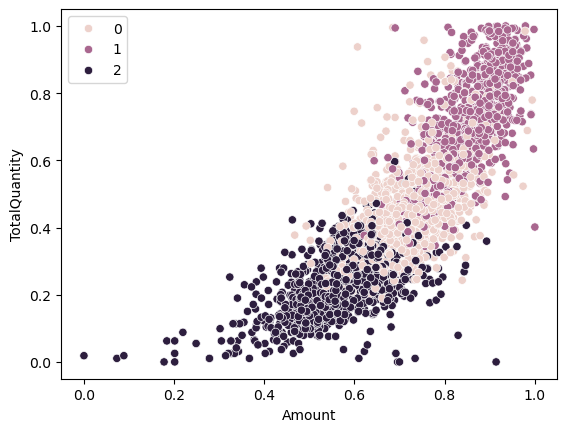

In [143]:
sns.scatterplot(data = df_scaled, x = 'Amount', y = 'TotalQuantity', hue = kmeans.labels_)

In [144]:
print(df_scaled.shape)
print(len(kmeans.labels_))

(3455, 3)
3455


## Evaluasi Model
Menggunakan `silhouette_score` dari Sklearn untuk menilai kualitas Clustering

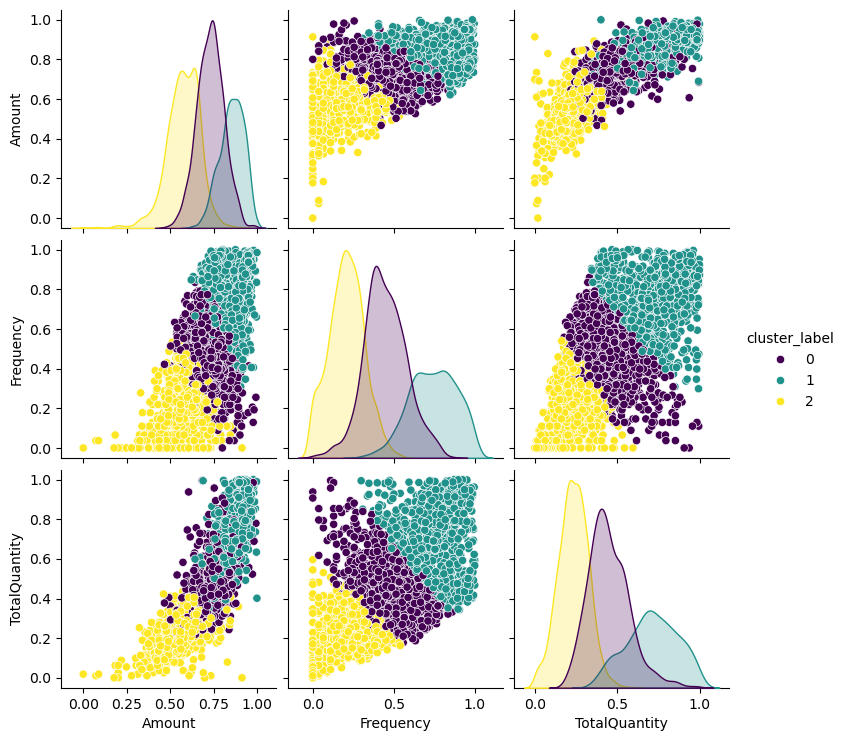

In [146]:
# Fit model dan tambahkan label cluster ke DataFrame
df_scaled['cluster_label'] = kmeans.fit_predict(df_scaled)  # Menggunakan fit_predict untuk mendapatkan label cluster

# Visualisasi dengan pairplot
sns.pairplot(df_scaled, hue='cluster_label', palette='viridis')
plt.show()

#### Cek Setiap `K` menggunakan Range dari `1 - 10`

In [148]:
from sklearn.metrics import silhouette_score

K = range(1, 11)
silhouette_scores = []
models = {}  

# Melakukan clustering untuk setiap nilai k dan menghitung silhouette score
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    df_scaled[f'cluster_label_{k}'] = kmeans.fit_predict(df_scaled)  # Menambahkan label cluster ke DataFrame
    
    # Hitung silhouette score jika k > 1
    if k > 1:
        score = silhouette_score(df_scaled, df_scaled[f'cluster_label_{k}'], metric='euclidean')
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(float('nan'))  # Mengisi NaN untuk k=1

### Visualisasi silhouette scores

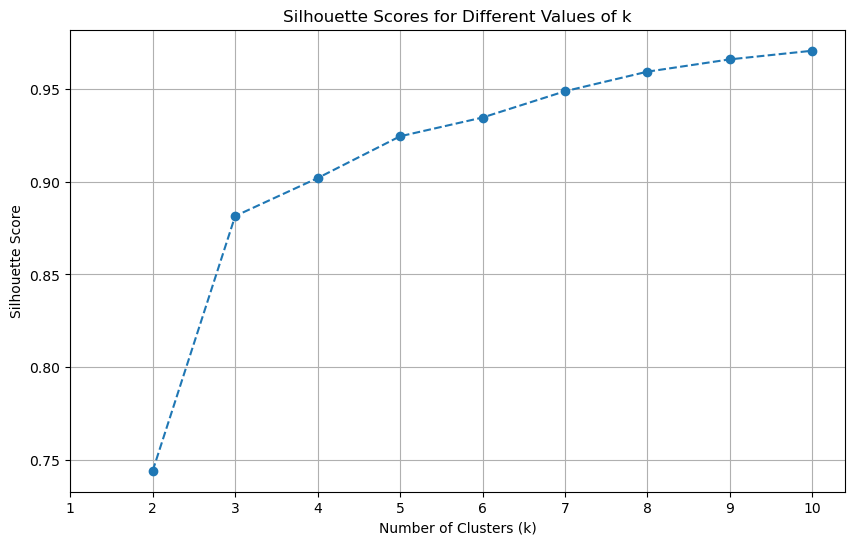

In [150]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.grid(True)
plt.show()

#### Best score yang kita dapatkan 

In [152]:
# Mengambil nilai terbesar, mengabaikan NaN
max_value = max(filter(lambda x: not pd.isna(x), silhouette_scores))

# Cetak nilai terbesar dalam persentase dengan dua angka di belakang koma
print(f"Nilai terbesar adalah: {max_value * 100:.2f}%")

Nilai terbesar adalah: 97.08%


In [153]:
silhouette_scores

[nan,
 0.7440239161372022,
 0.881562967795634,
 0.9020576081858789,
 0.9246288582887571,
 0.9347540877236101,
 0.9489572216578477,
 0.9595309082440979,
 0.9661713657396259,
 0.9708400774124396]